In [2]:
# importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Sensitivity analysis

[-0.31779727779662625, -0.6822027222033739, 0.202781928498727, 0.7964633650362828]
[-0.0998071170200612, -0.24996060999905081, 0.0849140047498166, 0.41689423746018367]


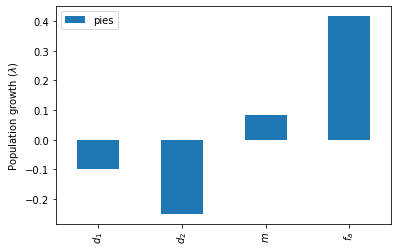

In [3]:
T1=[]
T2=[]
m=0.4
d_1=0.3
d_2=0.35
f=0.5
# find sensitivity analysis for each parameter
lamda=(2-d_1-d_2-m+((2-d_1-d_2-m)**2-4*((1-d_1-m)*(1-d_2)-f*m))**0.5)/2
lamda0=-1/2+(((2-d_1-d_2-m)**2-4*((1-d_1-m)*(1-d_2)-f*m))**(-0.5 ))*1/4*(-2*(2-d_1-d_2-m)+4*(1-d_2)) #d_1
lamda1=-1/2+(((2-d_1-d_2-m)**2-4*((1-d_1-m)*(1-d_2)-f*m))**(-0.5 ))*1/4*(-2*(2-d_1-d_2-m)+4*(1-d_1-m)) #d_2
lamda2=-1/2+(((2-d_1-d_2-m)**2-4*((1-d_1-m)*(1-d_2)-f*m))**(-0.5 ))*1/4*(-2*(2-d_1-d_2-m)+4*(1-d_2+f))#m
lamda3=m*(2-d_1-d_2-m+((2-d_1-d_2-m)**2-4*((1-d_1-m)*(1-d_2)-f*m))**(-0.5)) #f
T1.append(lamda0)
T1.append(lamda1)
T1.append(lamda2)
T1.append(lamda3)
# find the proportional sensitivity analysis
T2.append(lamda0*d_1/lamda)
T2.append(lamda1*d_2/lamda)
T2.append(lamda2*m/lamda)
T2.append(lamda3*f/lamda)
print(T1)
print(T2)
# plotting the propotional sensitivity
plotdata = pd.DataFrame(
    {"pies": [vals for vals in T2]}, 
    index=["$d_1$", "$d_2$", "$m$", "$f_a$"])
plotdata.plot(kind="bar")
plt.ylabel("Population growth $(\lambda)$")
plt.show()

## Exponential growth curve

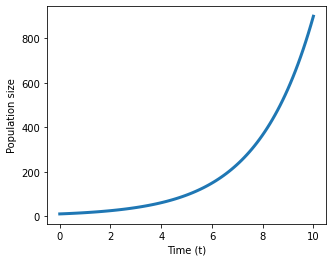

In [5]:
# Initialization
u=10
r=0.45
S=[]
K=np.linspace(0,10,100)
#Creating the list of exponential funcion
for i in range(len(K)):
    v=u*np.exp(r*K[i])
    S.append(v)
#Plotting the curve
fig = plt.figure(figsize=(5,4))
plt.plot(K,S,linewidth=3.0)
plt.xlabel("Time (t)")
plt.ylabel("Population size")
plt.show()

## Logistic growth curve

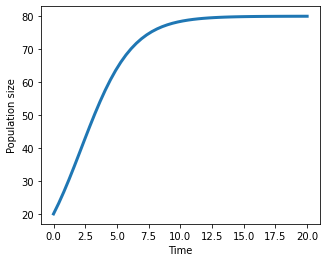

In [6]:
# function that returns dydt
def model(y,t):
    k =80
    r=0.5
    dydt =r*y*((k-y)/k)
    return dydt

y0 =20                 # initial condition
t= np.linspace(0,20)   # time range point
y = odeint(model,y0,t) # solve ODE
# plot results
fig = plt.figure(figsize=(5,4))
plt.plot(t,y,linewidth=3.0)
plt.xlabel('Time')
plt.ylabel('Population size')
plt.show()

## Roots of polynomial when $c<c^*$

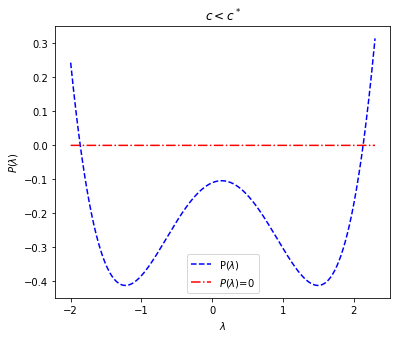

In [8]:
A1=[]
A2=[]
c=0.08    # wave speed
D_1=0.3   # juvenile dispersal rates 
D_2=0.3   # adult dispersal rates
m=0.6     # maturation rate
d_1=0.1   # mortality of juvenile
d_2=0.4   # mortality rate of adult
b=0.65    # reproduction rate
F=np.linspace(-2,2.3,10000)
for i in range(len(F)):
    P_c=(d_1+m+F[i]*(c-D_1*F[i]))*(d_2+F[i]*(c-D_2*F[i]))-b*m
    V=0
    A2.append(V)
    A1.append(P_c)
#plotting 
plt.figure(figsize=(6,5))
plt.plot(F,A1,"b--",label="P($\lambda$)")
plt.plot(F,A2,"r-.",label="$P(\lambda$)=0")
plt.legend()
plt.title("$c<c^*$")
plt.xlabel("$\lambda$")
plt.ylabel("$P(\lambda)$")
plt.show()

## Roots of Characteristic polynomial when $c=c^*$

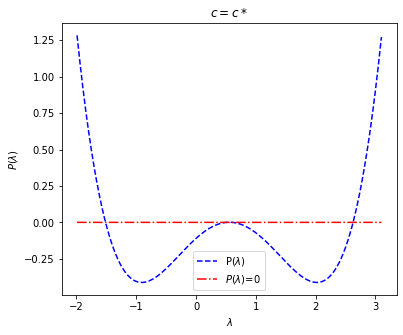

In [9]:
A5=[]
A6=[]
c=0.333889  # wave speed
F=np.linspace(-1.99,3.1,10000)
for i in range(len(F)):
    P_c=(d_1+m+F[i]*(c-D_1*F[i]))*(d_2+F[i]*(c-D_2*F[i]))-b*m
    V=0
    A5.append(P_c)
    A6.append(V)
#ploting 
plt.figure(figsize=(6,5))
plt.plot(F,A5,"b--",label="P($\lambda$)")
plt.plot(F,A6,"r-.",label="$P(\lambda$)=0")
plt.legend()
plt.title("$c = c*$")
plt.xlabel("$\lambda$")
plt.ylabel("$P(\lambda)$")
plt.legend()
plt.show()

## Roots of polynomial when $c>c^*$

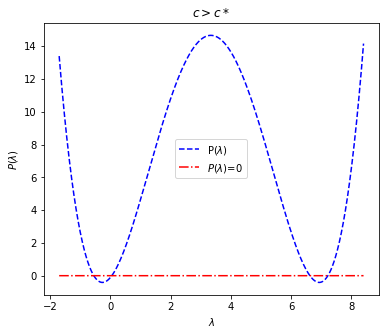

In [10]:
F=np.linspace(-1.7,8.4,10000)
A3=[]
A4=[]
c=2       # wave speed
for i in range(len(F)):
    P_c=(d_1+m+F[i]*(c-D_1*F[i]))*(d_2+F[i]*(c-D_2*F[i]))-b*m
    V=0
    A3.append(V)
    A4.append(P_c)
#ploting 
plt.figure(figsize=(6,5))
plt.plot(F,A4,"b--",label="P($\lambda$)")
plt.plot(F,A3,"r-.",label="$P(\lambda$)=0")
plt.legend()
plt.title("$c>c*$")
plt.xlabel("$\lambda$")
plt.ylabel("$P(\lambda)$")
plt.legend()
plt.show()

## Effect of maturation rate to spreading speed for different death rates.


### Case One; Juveniles disperse more than adults ($D_1>>D_2$)

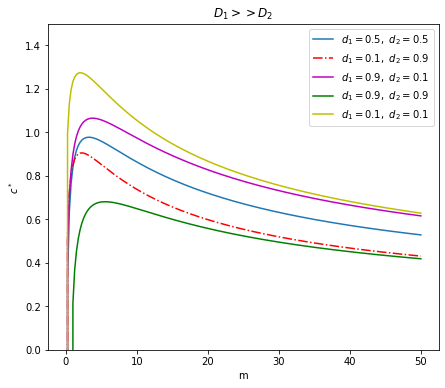

In [10]:
B1=[]
B2=[]
B3=[]
B4=[]
B5=[]
D_1=1         # Juvenile diffusion rate
D_2=0.01      # Adult diffusion rate
b=1.8         # Adult fertility rate
d_1=0.5       # Juvenile death rate
d_2=0.5       # Adult death rate
F=np.linspace(0,50,200)
T=np.linspace(0.000001,100,10000)
for i in range(len(F)):
    C1=[]
    C2=[]
    C3=[]
    C4=[]
    C5=[]
    for j in range(len(T)):
        c_1=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-d_1+d_2)**2+4*b*F[i])**0.5-(F[i]+d_1+d_2))/(2*T[j])
        c_2=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.1+0.9)**2+4*b*F[i])**0.5-(F[i]+0.1+0.9))/(2*T[j])
        c_3=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.9+0.1)**2+4*b*F[i])**0.5-(F[i]+0.9+0.1))/(2*T[j])
        c_4=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.9+0.9)**2+4*b*F[i])**0.5-(F[i]+0.9+0.9))/(2*T[j])
        c_5=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.1+0.1)**2+4*b*F[i])**0.5-(F[i]+0.1+0.1))/(2*T[j])
        C1.append(c_1)
        C2.append(c_2)
        C3.append(c_3)
        C4.append(c_4)
        C5.append(c_5)
#Find the minimum speed (c^*)
    B1.append(np.min(C1))
    B2.append(np.min(C2))
    B3.append(np.min(C3))
    B4.append(np.min(C4))
    B5.append(np.min(C5))
#ploting minimum speed against maturation rate
fig = plt.figure(figsize=(7,6))
plt.ylim([0,1.5])
plt.plot(F,B1,label="$d_1=0.5,~d_2=0.5$")
plt.plot(F,B2,"r-.",label="$d_1=0.1,~d_2=0.9$")
plt.plot(F,B3,"m",label="$d_1=0.9,~d_2=0.1$")
plt.plot(F,B4,"g",label="$d_1=0.9,~d_2=0.9$")
plt.plot(F,B5,"y",label="$d_1=0.1,~d_2=0.1$")
plt.legend()
plt.xlabel("m")
plt.ylabel("$c^*$")
plt.title("$D_1>>D_2$")
plt.show()

###  Case Two: When adults dispersion more than juveniles ($D_1<<D_2$)

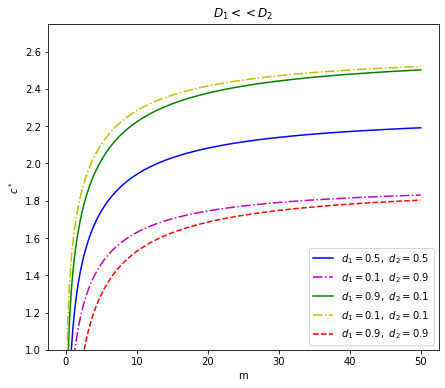

In [11]:
D1=[]
D2=[]
D3=[]
D4=[]
D5=[]
D_1=0.01 # Juvenile diffusion rate
D_2=1    # Adult diffusion rate
for i in range(len(F)):
    E1=[]
    E2=[]
    E3=[]
    E4=[]
    E5=[]
    for j in range(len(T)):
        c1=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-d_1+d_2)**2+4*b*F[i])**0.5-(F[i]+d_1+d_2))/(2*T[j])
        c2=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.1+0.9)**2+4*b*F[i])**0.5-(F[i]+0.1+0.9))/(2*T[j])
        c3= ((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.9+0.1)**2+4*b*F[i])**0.5-(F[i]+0.9+0.1))/(2*T[j])
        c4= ((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.1+0.1)**2+4*b*F[i])**0.5-(F[i]+0.1+0.1))/(2*T[j])
        c5= ((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.9+0.9)**2+4*b*F[i])**0.5-(F[i]+0.9+0.9))/(2*T[j])
        E1.append(c1)
        E2.append(c2)
        E3.append(c3)
        E4.append(c4)
        E5.append(c5)
    D1.append(np.min(E1))
    D2.append(np.min(E2)) 
    D3.append(np.min(E3))
    D4.append(np.min(E4))
    D5.append(np.min(E5))
#plotting
fig = plt.figure(figsize=(7,6))
plt.ylim([1,2.75])
plt.plot(F,D1,"b",label="$d_1=0.5,~d_2=0.5$")
plt.plot(F,D2,"m-.",label="$d_1=0.1,~d_2=0.9$")
plt.plot(F,D3,"g",label="$d_1=0.9,~d_2=0.1$")
plt.plot(F,D4,"y-.",label="$d_1=0.1,~d_2=0.1$")
plt.plot(F,D5,"r--",label="$d_1=0.9,~d_2=0.9$")
plt.legend()
plt.xlabel("m")
plt.ylabel("$c^*$")
plt.title("$D_1<<D_2$")
plt.show()

### Case Three; When juveniles and adults have the same dispersion ($D_1=D_2$)

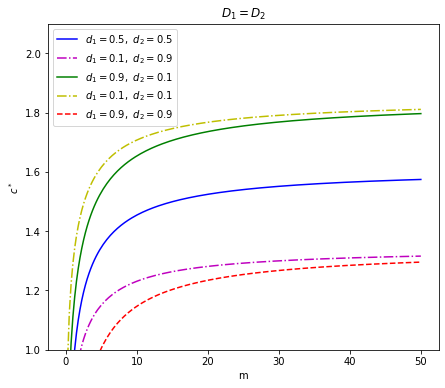

In [12]:
F1=[]
F2=[]
F3=[]
F4=[]
F5=[]
D_1=0.5
D_2=0.5
for i in range(len(F)):
    G1=[]
    G2=[]
    G3=[]
    G4=[]
    G5=[]
    for j in range(len(T)):
        cc=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-d_1+d_2)**2+4*b*F[i])**0.5-(F[i]+d_1+d_2))/(2*T[j])
        ca=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.1+0.9)**2+4*b*F[i])**0.5-(F[i]+0.1+0.9))/(2*T[j])
        cb= ((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.9+0.1)**2+4*b*F[i])**0.5-(F[i]+0.9+0.1))/(2*T[j])
        cd= ((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.1+0.1)**2+4*b*F[i])**0.5-(F[i]+0.1+0.1))/(2*T[j])
        ce= ((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-F[i]-0.9+0.9)**2+4*b*F[i])**0.5-(F[i]+0.9+0.9))/(2*T[j])
        G1.append(cc)
        G2.append(ca)
        G3.append(cb)
        G4.append(cd)
        G5.append(ce)
    # Take the minimum speed
    F1.append(np.min(G1))
    F2.append(np.min(G2)) 
    F3.append(np.min(G3))
    F4.append(np.min(G4))
    F5.append(np.min(G5))
#Plotting
fig = plt.figure(figsize=(7,6))
plt.ylim([1,2.1])
plt.plot(F,F1,"b",label="$d_1=0.5,~d_2=0.5$")
plt.plot(F,F2,"m-.",label="$d_1=0.1,~d_2=0.9$")
plt.plot(F,F3,"g",label="$d_1=0.9,~d_2=0.1$")
plt.plot(F,F4,"y-.",label="$d_1=0.1,~d_2=0.1$")
plt.plot(F,F5,"r--",label="$d_1=0.9,~d_2=0.9$")
plt.legend()
plt.xlabel("m")
plt.ylabel("$c^*$")
plt.title("$D_1=D_2$")
plt.show()

## Effect of maturation rate on spreading speed- Fisher  Equation

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


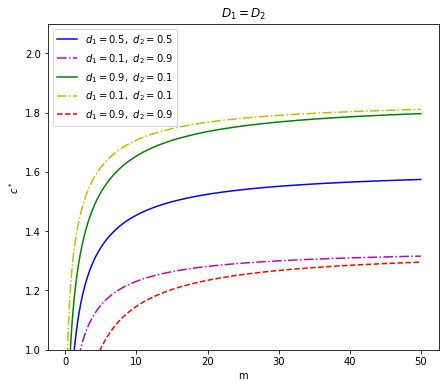

In [13]:
As=[]
Bs=[]
Cs=[]
Ds=[]
Es=[]
b=1.8
F=np.linspace(0,50,1000)
D_1=D_2=D=0.5
for i in range(len(F)): 
    r=2*(D*(((F[i]+d_1-d_2)**2+4*b*F[i])**(0.5)-(F[i]+d_1+d_2))/2)**0.5
    r1=2*(D*(((F[i]+0.1-0.9)**2+4*b*F[i])**(0.5)-(F[i]+0.1+0.9))/2)**0.5
    r2=2*(D*(((F[i]+0.9-0.1)**2+4*b*F[i])**(0.5)-(F[i]+0.9+0.1))/2)**0.5
    r3=2*(D*(((F[i]+0.1-0.1)**2+4*b*F[i])**(0.5)-(F[i]+0.1+0.1))/2)**0.5
    r4=2*(D*(((F[i]+0.9-0.9)**2+4*b*F[i])**(0.5)-(F[i]+0.9+0.9))/2)**0.5
    As.append(r)
    Bs.append(r1)
    Cs.append(r2)
    Ds.append(r3)
    Es.append(r4)
#plotting
fig = plt.figure(figsize=(7,6))
plt.ylim([1,2.1])
plt.plot(F,As,"b",label="$d_1=0.5,~d_2=0.5$")
plt.plot(F,Bs,"m-.",label="$d_1=0.1,~d_2=0.9$")
plt.plot(F,Cs,"g",label="$d_1=0.9,~d_2=0.1$")
plt.plot(F,Ds,"y-.",label="$d_1=0.1,~d_2=0.1$")
plt.plot(F,Es,"r--",label="$d_1=0.9,~d_2=0.9$")
plt.legend()
plt.xlabel("m")
plt.ylabel("$c^*$")
plt.title("$D_1=D_2$")
plt.show()

## Effect of Juvenile dispersion on spreading speed for different maturation rate.

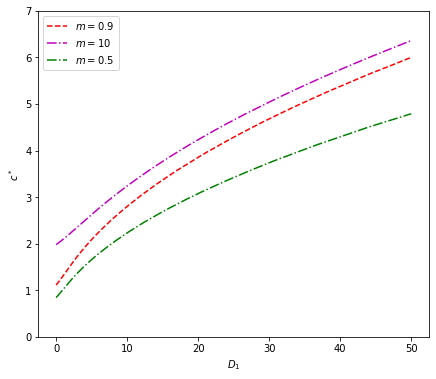

In [14]:
F1=[]
F2=[]
F3=[]
t=0.9      # maturation rate 
D_2=1      # adult diffusion rate
D_1=1.2    # juvenile diffusion rate
d_1=0.5    # juvenile death rate
d_2=0.45   # Adult death rate
b=1.8      # adult fertility rate
for i in range(len(F)):
    F4=[]
    F5=[]
    F6=[]
    for j in range(len(T)):
        ct=((F[i]+D_2)/2)*T[j]+((((F[i]-D_2)*T[j]**2-t-d_1+d_2)**2+4*b*t)**0.5-(t+d_1+d_2))/(2*T[j])
        cr=((F[i]+D_2)/2)*T[j]+((((F[i]-D_2)*T[j]**2-10-d_1+d_2)**2+4*b*10)**0.5-(10+d_1+d_2))/(2*T[j])
        ck=((F[i]+D_2)/2)*T[j]+((((F[i]-D_2)*T[j]**2-0.5-d_1+d_2)**2+4*b*0.5)**0.5-(0.5+d_1+d_2))/(2*T[j])
        F4.append(ct)
        F5.append(cr)
        F6.append(ck)
    F1.append(np.min(F4))
    F2.append(np.min(F5))
    F3.append(np.min(F6))
fig = plt.figure(figsize=(7, 6))
plt.ylim([0,7])
plt.plot(F,F1,"r--",label="$m=0.9$")
plt.plot(F,F2,"m-.",label="$m=10$")
plt.plot(F,F3,"g-.",label="$m=0.5$")
plt.legend()
plt.xlabel("$D_1$")
plt.ylabel("$c^*$")
plt.show()

## Effect of adult dispersion on spreading speed for different maturation rate

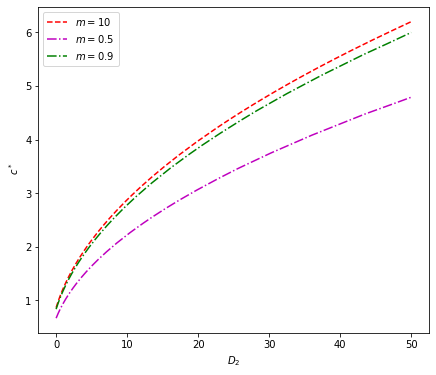

In [15]:
H1=[]
H2=[]
H3=[]
t=10
D_1=1
for i in range(len(F)):
    H4=[]
    H5=[]
    H6=[]
    for j in range(len(T)):
        c=((F[i]+D_1)/2)*T[j]+((((D_1+F[i])*T[j]**2-t-d_1+d_2)**2+4*b*t)**0.5-(t+d_1+d_2))/(2*T[j])
        cr=((F[i]+D_1)/2)*T[j]+((((D_1+F[i])*T[j]**2-0.5-d_1+d_2)**2+4*b*0.5)**0.5-(0.5+d_1+d_2))/(2*T[j])
        ck=((F[i]+D_1)/2)*T[j]+((((D_1+F[i])*T[j]**2-0.9-d_1+d_2)**2+4*b*0.9)**0.5-(0.9+d_1+d_2))/(2*T[j])
        H4.append(c)
        H5.append(cr)
        H6.append(ck)
    H1.append(np.min(H4))
    H2.append(np.min(H5))
    H3.append(np.min(H6))
fig = plt.figure(figsize=(7, 6))
plt.plot(F,H1,"r--",label="$m=10$")
plt.plot(F,H2,"m-.",label="$m=0.5$")
plt.plot(F,H3,"g-.",label="$m=0.9$")
plt.legend()
plt.xlabel("$D_2$")
plt.ylabel("$~c^*$")
plt.show()

## Effect of fertility rate on spreading speed for different dispersion rate

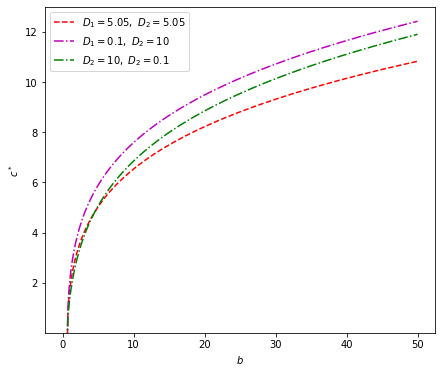

In [16]:
K1=[]
K2=[]
K3=[]
m=0.9
D_2=5.05
D_1=5.05
d_1=0.5
d_2=0.45
for i in range(len(F)):
    K4=[]
    K5=[]
    K6=[]
    for j in range(len(T)):
        c=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-m-d_1+d_2)**2+4*F[i]*m)**0.5-(m+d_1+d_2))/(2*T[j])
        cr=((0.1+10)/2)*T[j]+((((0.1-10)*T[j]**2-m-d_1+d_2)**2+4*F[i]*m)**0.5-(m+d_1+d_2))/(2*T[j])
        ck=((10+0.1)/2)*T[j]+((((10-0.1)*T[j]**2-m-d_1+d_2)**2+4*F[i]*m)**0.5-(m+d_1+d_2))/(2*T[j])
        K4.append(c)
        K5.append(cr)
        K6.append(ck)
    K1.append(np.min(K4))
    K2.append(np.min(K5))
    K3.append(np.min(K6))
#ploting
fig = plt.figure(figsize=(7,6))
plt.ylim([0.01,13])
plt.plot(F,K1,"r--",label="$D_1=5.05,~D_2=5.05$")
plt.plot(F,K2,"m-.",label="$D_1=0.1,~D_2=10$")
plt.plot(F,K3,"g-.",label="$D_2=10,~D_2=0.1$")
plt.legend()
plt.xlabel("$b$")
plt.ylabel("$c^*$")
plt.show()

## Effect of Fertility rate for different maturation rate.

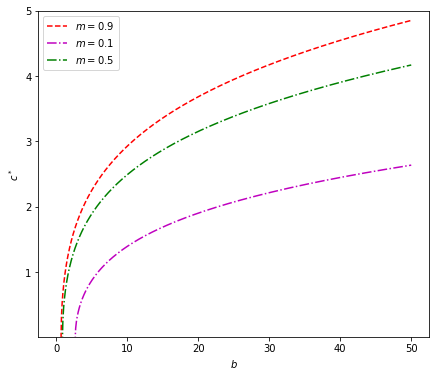

In [17]:
R1=[]
R2=[]
R3=[]
t=0.9
D_2=1
D_1=1.03
d_1=0.5
d_2=0.45
b=1.8
for i in range(len(F)):
    R4=[]
    R5=[]
    R6=[]
    for j in range(len(T)):
        c=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-t-d_1+d_2)**2+4*F[i]*t)**0.5-(t+d_1+d_2))/(2*T[j])
        cr=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-0.10-d_1+d_2)**2+4*F[i]*0.1)**0.5-(0.10+d_1+d_2))/(2*T[j])
        ck=((D_1+D_2)/2)*T[j]+((((D_1-D_2)*T[j]**2-0.5-d_1+d_2)**2+4*F[i]*0.5)**0.5-(0.5+d_1+d_2))/(2*T[j])
        R4.append(c)
        R5.append(cr)
        R6.append(ck)
    R1.append(np.min(R4))
    R2.append(np.min(R5))
    R3.append(np.min(R6))
fig = plt.figure(figsize=(7,6))
plt.ylim([0.01,5])
plt.plot(F,R1,"r--",label="$m=0.9$")
plt.plot(F,R2,"m-.",label="$m=0.1$")
plt.plot(F,R3,"g-.",label="$m=0.5$")
plt.legend()
plt.xlabel("$b$")
plt.ylabel("$c^*$")
plt.show()